<a href="https://en.wikipedia.org/wiki/Chicago"><img src = "https://media.nbcchicago.com/images/652*435/Chicago+skyline+generic1.jpg" width = 600> </a>

<h1 align=center><font size = 5>What’s the best location to set up a high-end coffee shop in Chicago?</font></h1>

In [5]:
# First, let's install all required packages

import pandas as pd
import requests


import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
#=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-2.5           |   py36h1ba5d50_0         643 KB
    conda-4.6.3                |           py36_0         872 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    libarchive-3.3.3           |       h5d8350f_5         1.5 MB
    grpcio-1.16.1              |   py36hf8bcb03_1         1.1 MB
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    libssh2-1.8.0              |                1         239 KB  conda-forge
    python-3.6.8               |       h0371630_0        34.4 MB
    ------------------------------------------------------------
      

In [6]:
wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago').text
chicago_neighborhoods = pd.read_html(wiki_page, header=0, attrs={"class":"wikitable sortable"})[0]

chicago_neighborhoods.head(10)


,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square
5,Ashburn,Ashburn
6,Ashburn Estates,Ashburn
7,Auburn Gresham,Auburn Gresham
8,Avalon Park,Avalon Park
9,Avondale,Avondale


In [7]:
#define function that get the coordinates of a provided address, in this case of the chicago neighborhoods
def get_coords(neighborhood, output_as='center'):

    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search.php?q=',
                             neighborhood+',Chicago , Illinois, USA',
                             '&format=json&polygon=0')
    if len(requests.get(url).json()) > 0:
        response = requests.get(url).json()[0]

        # parse response to list
        if output_as == 'boundingbox':
            lst = response[output_as]
            output = [float(i) for i in lst]
        if output_as == 'center':
            lst = [response.get(key) for key in ['lat','lon']]
            output = [float(i) for i in lst]
        return output
    else: 
        lat=0
        long=0
        return lat, long
        

In [8]:
#execute function to get coordinates of each neighborhood
df2 = chicago_neighborhoods.copy()

latitudeCln = []
longitudeCln = []
for index, row in df2.iterrows():
    print(row[0])
    lat, long = get_coords(neighborhood=row[0], output_as='center')
    latitudeCln.append(lat)
    longitudeCln.append(long)

df2['Latitude'] = latitudeCln
df2['Longitude'] = longitudeCln
df2.shape

Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Ashburn Estates
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Heights
Belmont Terrace
Beverly
Beverly View
Beverly Woods
Big Oaks
Boystown
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cottage Grove Heights
Cragin
Crestline
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Fulton River District
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Graceland West
Grand

(246, 4)

In [9]:
#Get coordinates for Chicago
address = 'Chicago, Illinois'

geolocator = Nominatim(user_agent="capstoneProject")
location = geolocator.geocode(address, timeout=60, exactly_one=True)
latitude = location.latitude
longitude = location.longitude
print("Chicago's Latidude is %s and Longitude is %s" % (latitude, longitude))

Chicago's Latidude is 41.8755616 and Longitude is -87.6244212


In [10]:
# We remove neighborhoods that Nominatim couldn't recognize (lat and long = 0)
df2 = df2[df2.Latitude != 0]
df2.head(10)
df3 = df2.copy()

In [11]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, local in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_chicago)  
    
map_chicago

#### Define Foursquare Credentials and Version

In [34]:
#CLIENT_ID = 'OWUPVDYWM1F1CB1JOHQYNKR1JTARCR5FXEF2X0QGOFIX3CCS' # your Foursquare ID
#CLIENT_SECRET = 'DE4BF0OITHGK1XSRKMK2T3JA4UDRYK4JVRVC1S5ZZHTAWGF5' # your Foursquare Secret
#VERSION = '20190205' # Foursquare API version


CLIENT_ID = 'FIVNBFHFDUSO4AVVPTSJL5I0U3YYOGKC4NQ0JZPCRWQ0NLXL' # your Foursquare ID
CLIENT_SECRET = 'POTX1C1KWMSW4BI3NJF3YBCTO4KT2Q2WMMXI1VZMEQCA5MLL' # your Foursquare Secret
VERSION = '20190210' # Foursquare API version


#### Let's explore neighbourhoods in Chicago

In [13]:
# This function returns the venues in Chicago's neighborhood
# If catID is not populated, returns all venues, otherwise limit the results to the specified venue category
def getNearbyVenues(names, latitudes, longitudes, catID, radius=1000):
    venues_list=[]
    LIMIT = 500 # limit of number of venues returned by Foursquare API
    #catID = '4bf58dd8d48988d1ae941735' 
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            catID,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # print(results)
              
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *chicago_venues*.

In [104]:
chicago_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude'], catID=''
                                  )

KeyboardInterrupt: 

In [98]:
chicago_venues.shape

(13004, 9)

In [99]:
# Let's take a look at the venue categories that we find the most in Chicago
chi = chicago_venues.groupby(['Venue Category'])['Venue Category'].count()
chi.nlargest(25)

Venue Category
Pizza Place             454
Mexican Restaurant      443
Bar                     386
Coffee Shop             386
Park                    376
Sandwich Place          373
Fast Food Restaurant    318
Grocery Store           258
American Restaurant     216
Italian Restaurant      212
Chinese Restaurant      204
Bakery                  193
Donut Shop              184
Café                    176
Discount Store          176
Gym                     156
Breakfast Spot          152
Pharmacy                140
Ice Cream Shop          139
Gym / Fitness Center    138
Cosmetics Shop          135
Diner                   135
Sushi Restaurant        130
Hotel                   117
Liquor Store            117
Name: Venue Category, dtype: int64

#### Get venues of type coffee shops, Café, Bakeries, Offices, Universities
#### These will be used to compute a score for each Neighborhood

In [14]:
# Offices
chicago_offices = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude'], catID='4bf58dd8d48988d126941735' #   '4bf58dd8d48988d124941735'
                                  )
chicago_offices.head()

Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Terrace
Beverly
Beverly View
Big Oaks
Boystown
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cragin
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Graceland West
Grand Boulevard
Grand Crossing
Greater Grand Crossing
Greektown
Gresham
Groveland Park
Hamilton Park
Hans

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.971937,-87.716174,Consulate of Ecuador - Annex Office,41.968407,-87.710789,Embassy / Consulate
1,Altgeld Gardens,41.654864,-87.600439,MWRDGC - Calumet WRP,41.659293,-87.607727,Government Building
2,Andersonville,41.977139,-87.669273,http://www.andersonville.org/,41.976760,-87.668030,Government Building
3,Andersonville,41.977139,-87.669273,Fuller Counseling Group,41.975032,-87.675007,Office
4,Andersonville,41.977139,-87.669273,South-East Asia Center,41.975328,-87.659991,Government Building


In [18]:
# Universities
chicago_universities = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude'], catID='4d4b7105d754a06372d81259'
                                  )
chicago_universities.head()

Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Terrace
Beverly
Beverly View
Big Oaks
Boystown
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cragin
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Graceland West
Grand Boulevard
Grand Crossing
Greater Grand Crossing
Greektown
Gresham
Groveland Park
Hamilton Park
Hans

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.971937,-87.716174,"Nyvall Hall, North Park Theological Seminary",41.974468,-87.711383,University
1,Albany Park,41.971937,-87.716174,North Park University,41.975154,-87.710029,University
2,Albany Park,41.971937,-87.716174,North Park Theological Seminary,41.974575,-87.711416,College Academic Building
3,Albany Park,41.971937,-87.716174,Caroline Hall - North Park University,41.974494,-87.710809,College Academic Building
4,Albany Park,41.971937,-87.716174,Magnuson Campus Center - North Park University,41.972823,-87.711839,General College & University


In [39]:
# Bakeries, Dessert shops
chicago_bakeries = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude'], catID='4bf58dd8d48988d1d0941735'
                                  )
chicago_bakeries.head()

Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Terrace
Beverly
Beverly View
Big Oaks
Boystown
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cragin
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Graceland West
Grand Boulevard
Grand Crossing
Greater Grand Crossing
Greektown
Gresham
Groveland Park
Hamilton Park
Hans

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.971937,-87.716174,la Michoacana Premium,41.968559,-87.706510,Ice Cream Shop
1,Albany Park,41.971937,-87.716174,Jaafer Sweets,41.969251,-87.708161,Bakery
2,Albany Park,41.971937,-87.716174,Nazareth Sweets,41.965821,-87.708437,Bakery
3,Albany Park,41.971937,-87.716174,Markellos Baking Company,41.968602,-87.716607,Dessert Shop
4,Albany Park,41.971937,-87.716174,Baskin-Robbins,41.970937,-87.708739,Ice Cream Shop


In [35]:
# Cafés, Coffee shops
chicago_coffee_shops = getNearbyVenues(names=df3['Neighborhood'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude'], catID='4bf58dd8d48988d1e0931735'
                                  )
chicago_coffee_shops.head()

Albany Park
Altgeld Gardens
Andersonville
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Terrace
Beverly
Beverly View
Big Oaks
Boystown
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cragin
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goose Island
Graceland West
Grand Boulevard
Grand Crossing
Greater Grand Crossing
Greektown
Gresham
Groveland Park
Hamilton Park
Hans

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.971937,-87.716174,Starbucks,41.975922,-87.710019,Coffee Shop
1,Albany Park,41.971937,-87.716174,Cafe Chien,41.968060,-87.710754,Coffee Shop
2,Albany Park,41.971937,-87.716174,Viking Café,41.975091,-87.709615,Coffee Shop
3,Albany Park,41.971937,-87.716174,La Montana's Cafe,41.968433,-87.709750,Café
4,Albany Park,41.971937,-87.716174,Nancy's Rainbow,41.968433,-87.708520,Coffee Shop


In [ ]:
df.to_csv(file_name, sep='\t', encoding='utf-8')

In [23]:
# Add the venue category count per neighborhood

def newVenueCat(df, catName, venueCat):
    grouped = venueCat.groupby('Neighborhood').count()
    
    for n in venueCat['Neighborhood']:
        try:
            df.loc[df['Neighborhood'] == n,catName] = grouped.loc[n, 'Venue']
        except:
            df.loc[df['Neighborhood'] == n,catName] = 0
            

In [56]:
df_data = df3.copy()
newVenueCat(df_data, 'Offices', chicago_offices)
newVenueCat(df_data, 'Universities', chicago_universities)
newVenueCat(df_data, 'Bakeries', chicago_bakeries)
newVenueCat(df_data, 'Coffee Shops', chicago_coffee_shops)
df_data

,Neighborhood,Community area,Latitude,Longitude,Universities,Offices,Bakeries,Coffee Shops
0,Albany Park,Albany Park,41.971937,-87.716174,64.0,1.0,15.0,6.0
1,Altgeld Gardens,Riverdale,41.654864,-87.600439,1.0,1.0,NaN,NaN
2,Andersonville,Edgewater,41.977139,-87.669273,15.0,6.0,25.0,12.0
3,Archer Heights,Archer Heights,41.811422,-87.726165,2.0,1.0,7.0,1.0
4,Armour Square,Armour Square,41.840033,-87.633107,54.0,6.0,7.0,5.0
5,Ashburn,Ashburn,41.747533,-87.711163,1.0,4.0,3.0,NaN
7,Auburn Gresham,Auburn Gresham,41.750474,-87.664304,NaN,4.0,4.0,1.0
8,Avalon Park,Avalon Park,41.745035,-87.588658,NaN,1.0,1.0,1.0
9,Avondale,Avondale,41.938921,-87.711168,6.0,3.0,18.0,6.0
10,Avondale Gardens,Irving Park,41.938921,-87.711168,6.0,3.0,18.0,6.0


#### Define weight of each venue category in score determination

In [29]:
weight_offices = 3 # Having offices around is good

In [30]:
weight_universities = 2 # Having universities around is good

In [31]:
weight_bakeries = -1 # Having bakeries around is bad (competition)

In [32]:
weight_coffee_shops = -3 # Having coffee shops around is bad (competition)

#### Compute score

In [57]:
df_data = df_data.fillna(0)
chicago_score = df_data[['Neighborhood']].copy() # Create new df with just the neighborhood
chicago_score['Score'] = df_data['Offices'] * weight_offices + df_data['Universities'] * weight_universities + df_data['Bakeries'] * weight_bakeries + df_data['Coffee Shops'] * weight_coffee_shops
chicago_score = chicago_score.sort_values(by=['Score'], ascending=False)

chicago_score.head(5) # Top 5 recommendations

,Neighborhood,Score
96,The Island,235.0
173,Printer's Row,204.0
212,Tri-Taylor,193.0
214,Union Ridge,191.0
215,University Village,184.0


#### Display winner neighborhood  on map

In [77]:
#Get coordinates for Winning Neighborhood
address = 'The Island, Chicago, Illinois'

geolocator = Nominatim(user_agent="capstoneProject")
location = geolocator.geocode(address, timeout=60, exactly_one=True)
latitude = location.latitude
longitude = location.longitude
print("The winning neighbordhood Latidude is %s and Longitude is %s" % (latitude, longitude))

The winning neighbordhood Latidude is 41.8755616 and Longitude is -87.6244212


In [78]:
# Add specific venues to an existing map
def newVenueMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [79]:
map_chicago_winner = folium.Map(location=[latitude, longitude], zoom_start=15)


chicago_winner = df3[df3['Neighborhood'] == 'The Island']

for lat, lng, local in zip(chicago_winner['Latitude'], chicago_winner['Longitude'], chicago_winner['Neighborhood']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_chicago_winner) 

newVenueMap(chicago_offices[chicago_offices['Neighborhood'] == 'The Island'], '#ff69b4', map_chicago_winner)  # offices in Pink
newVenueMap(chicago_universities[chicago_universities['Neighborhood'] == 'The Island'], '#006400', map_chicago_winner) # Universisties in Green
newVenueMap(chicago_bakeries[chicago_bakeries['Neighborhood'] == 'The Island'], '#ffff00', map_chicago_winner) # Dessert shops in Yellow
newVenueMap(chicago_coffee_shops[chicago_coffee_shops['Neighborhood'] == 'The Island'], '#ff0000', map_chicago_winner) # Coffee shops in Red

map_chicago_winner

#### Build a K-Means clustering model to see what other neighborhoods look like our winning neighborhood for more choices

In [80]:
#Copy dataframe
df_final = df_data.copy()

# Set number of clusters
clusters = 5

chicago_clustering = df_final.drop(['Neighborhood','Community area','Latitude','Longitude'], 1)

# run k-means
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(chicago_clustering)

# check cluster labels 
kmeans.labels_[0:10]

array([2, 0, 3, 0, 2, 0, 0, 0, 3, 3], dtype=int32)

In [81]:
# Add Cluster label column to main DF
df_final.insert(0, 'Cluster Labels', kmeans.labels_)
df_final.head()

,Cluster Labels,Neighborhood,Community area,Latitude,Longitude,Universities,Offices,Bakeries,Coffee Shops
0,2,Albany Park,Albany Park,41.971937,-87.716174,64.0,1.0,15.0,6.0
1,0,Altgeld Gardens,Riverdale,41.654864,-87.600439,1.0,1.0,0.0,0.0
2,3,Andersonville,Edgewater,41.977139,-87.669273,15.0,6.0,25.0,12.0
3,0,Archer Heights,Archer Heights,41.811422,-87.726165,2.0,1.0,7.0,1.0
4,2,Armour Square,Armour Square,41.840033,-87.633107,54.0,6.0,7.0,5.0


#### Display clusters on a scatter plot

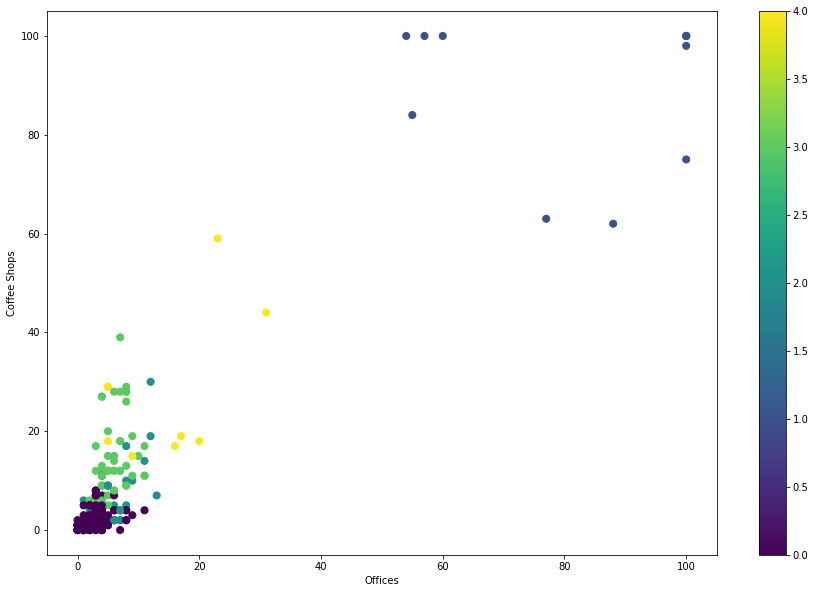

In [102]:
x = df_final['Offices']
y = df_final['Coffee Shops']
Cluster = df_final['Cluster Labels']
centers = np.random.randn(8, 2) 

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)

ax.set_xlabel('Offices')
ax.set_ylabel('Coffee Shops')
plt.colorbar(scatter)

fig.show()

#### Finally extract all neighborhoods that might also be good recommendations based on the fact that they are in the same cluster as our winner neighborhood

In [83]:
final_recommendations = df_final[df_final['Cluster Labels'] == 1]
final_recommendations

,Cluster Labels,Neighborhood,Community area,Latitude,Longitude,Universities,Offices,Bakeries,Coffee Shops
71,1,The Gap,Douglas,41.892357,-87.623588,100.0,60.0,80.0,100.0
96,1,The Island,Austin,41.875562,-87.624421,100.0,88.0,43.0,62.0
108,1,Lake View,Lake View,41.885382,-87.627908,100.0,100.0,46.0,100.0
121,1,The Loop,The Loop,41.881609,-87.629457,100.0,100.0,55.0,100.0
124,1,Magnificent Mile,Near North Side,41.894523,-87.624228,100.0,54.0,65.0,100.0
162,1,Park West,Lincoln Park,41.882557,-87.622500,100.0,100.0,60.0,98.0
173,1,Printer's Row,The Loop,41.873787,-87.628900,100.0,77.0,38.0,63.0
180,1,River North,Near North Side,41.888341,-87.617903,86.0,55.0,62.0,84.0
210,1,Streeterville,Near North Side,41.893365,-87.621997,88.0,57.0,68.0,100.0
214,1,Union Ridge,Norwood Park,41.878295,-87.638949,84.0,100.0,52.0,75.0


In [85]:
df_data.to_csv("df_data.csv", sep=',', encoding='utf-8')